# Data Pre-processing
It is the important step in the data science for transforming raw data into a clean structured format for analysis. It involves tasks like handling missing values, normalizing data and encoding variables. 

**Pre-processing** refers to the transformations applied to data before feeding it to the algorithm.

---



**Steps in Data Pre-processing**

**Step 1** : Import Necessary Libraries

**Step 2** : Load the Dataset

**Step 3** : Check Dataset Information

**Step 4** : Statistical Analysis

**Step 5** : Check Outliers

**Step 6** : Remove Outliers (IQR Method)

**Step 7** : Correlation Analysis

**Step 8** : Outcome Proportionality

**Step 9** : Separate Features & Target Variable

**Step 10** : Normalization

**Step 11** : Standardization

---

## Scaling

It is the process of changing range of numbers in your data so all features are on a similar scale, making it easier for the machine learning model to learn.

--- 

**Why it's important:**

1. **Range consistency** — prevents large-scale features from dominating.
2. **Better algorithm performance** — speeds up convergence (e.g., Gradient Descent).
3. **Prevents numerical instability** — avoids overflow/underflow in calculations.
4. **Equal importance** — ensures all features contribute fairly.

---

### StandardScaler

This method of scaling is basically based on the central tendencies and variance of the data. 

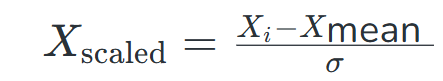

- Mean = 0, Std Dev = 1.
- Best for: Data that follows a normal distribution.
- Works well with: Linear Regression, Logistic Regression, SVM.


MinMaxScaler:

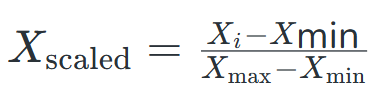

- Range: **0 to 1** (or custom range).
- **Cons:** Affected by outliers.
- Best for: Algorithms that assume bounded data (e.g., Neural Nets).

---

**This method of scaling requires below two-step:**

1. First we are supposed to find the minimum and the maximum value of the column.
2. Then we will subtract the minimum value from the entry and divide the result by the difference between the maximum and the minimum value.

In [51]:
#Standard-Scaler and Min-Max scaler
## Import libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Example dataset (2 features)
X = np.array([[1, 200],
              [2, 300],
              [3, 400],
              [4, 500]])

print("Original Data:\n", X)

# ------------------------------
# 1. StandardScaler (mean=0, std=1)
# ------------------------------
std_scaler = StandardScaler()
X_standard = std_scaler.fit_transform(X)
print("\nAfter Standard Scaling:\n", X_standard)

# ------------------------------
# 2. MinMaxScaler (range 0 to 1)
# ------------------------------
mm_scaler = MinMaxScaler()
X_minmax = mm_scaler.fit_transform(X)
print("\nAfter Min-Max Scaling:\n", X_minmax)


Original Data:
 [[  1 200]
 [  2 300]
 [  3 400]
 [  4 500]]

After Standard Scaling:
 [[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]

After Min-Max Scaling:
 [[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


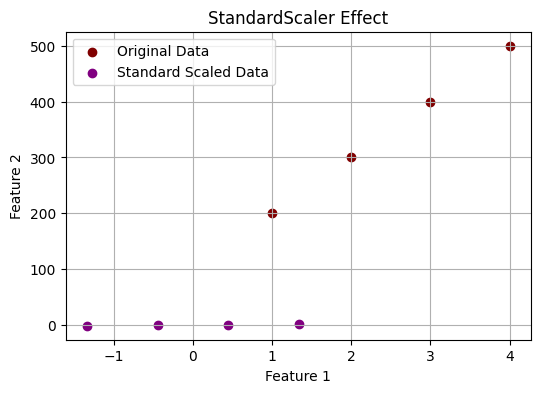

In [52]:
# Plotting of Standard Scaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
X = np.array([[1, 200],
              [2, 300],
              [3, 400],
              [4, 500]])

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], color='Maroon', label='Original Data')
plt.scatter(X_scaled[:,0], X_scaled[:,1], color='purple', label='Standard Scaled Data')
plt.title("StandardScaler Effect")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


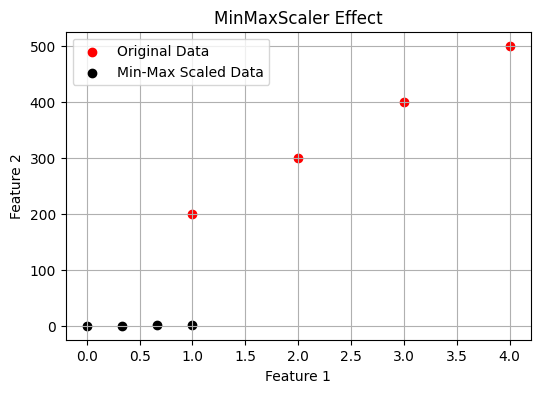

In [53]:
# Plotting of Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
X = np.array([[1, 200],
              [2, 300],
              [3, 400],
              [4, 500]])

# Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], color='red', label='Original Data')
plt.scatter(X_scaled[:,0], X_scaled[:,1], color='Black', label='Min-Max Scaled Data')
plt.title("MinMaxScaler Effect")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


## One-hot Encoding

**One-Hot Encoding** is a method used to convert **categorical data** like colors, types, or labels into a **binary (0/1) format** so that machine learning models can understand it. For each unique category, it creates a separate column where:

- 1 indicates the presence of that category in a particular row
- 0 indicates its absence

---

**Why Use One-Hot Encoding?**

**Removes ordinality**: Prevents the model from treating categories as ordered.

**Model compatibility**: Converts categories into numerical form for algorithms.

**Better performance**: Helps the model understand relationships in categorical data.

---



### Implementation of One-hot Encoding



In [54]:
# Using pandas 
# Gives true false output
import pandas as pd
df = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red']})
df_encoded = pd.get_dummies(df, columns=['Color'], drop_first=False)  # drop_first=True to avoid multicollinearity
print(df_encoded)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False        False       True


In [55]:
# Using Scikit-Learn
# Gives numerical output
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ['Color']
ohe = OneHotEncoder(sparse_output=False)
encoded_array = ohe.fit_transform(df[categorical_cols])
encoded_cols = ohe.get_feature_names_out(categorical_cols)
df_ohe = pd.DataFrame(encoded_array, columns=encoded_cols)
print(df_ohe)


   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
3         0.0          0.0        1.0


**One-Hot**: Ideal for nominal categories (no inherent order).

**Label Encoding** : Suitable for ordinal data (e.g., "Low", "Medium", "High") but can mislead models if used for nominal data.

---

**Pros & Cons of One-Hot Encoding**

**Pros**:

- Prevents implicit ordering of categories

- Easy to interpret and implement

- Works seamlessly with many ML models


**Cons**:

- Increases dimensionality—creates potentially many new features

- Leads to sparsity (mostly zeros), making computational demands higher

- Can cause multicollinearity if not handled carefully (e.g., use drop_first=True)

---

**Summary** 

- Converts categories to binary columns (one per unique value).

- Essential for encoding nominal data for ML models.

- Helps models treat categories fairly, preventing false ordering.

- Easy to use with Pandas (get_dummies) and Scikit-Learn (OneHotEncoder).

- Watch out for increased memory usage and potential collinearity.

---

## Train/Test Split

Splits data into:

- Training set : for learning patterns (70–80% of data).

- Testing set : for checking performance on unseen data (20–30% of data).




### Linear Regression with train/test split

In [56]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('Advertising.csv')
df.dropna(inplace=True)  # Remove null values

# Separate features and target
X = df.drop('sales', axis=1)
y = df['sales']

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# Scale the features
scaler = StandardScaler()
scaler.fit(X_train)  # Learn scaling parameters from training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Predictions:", y_pred)
print("Mean Squared Error:", mse)


Predictions: [19.82000933 14.23636718 12.80417236  7.75461569  8.31672266 15.4001915
 11.6590983  15.22650923 15.53524916 19.46415132 17.21364106 16.69603229
 16.46449309 10.15345178 13.44695953 24.71946196 18.67190453 15.85505154
 14.45450049  9.91684409 10.41647177  4.61335238 17.41531451 17.31014955
 21.72288151  5.87934089 11.29101265 17.88733657 21.04225992 12.32251227
 14.4099317  15.05829814 10.2105313   7.28532072 12.66133397 23.25847491
 18.87101505  4.55545854 19.79603707  9.21203026 10.24668718  8.96989469
 13.33515217 20.69532628 12.17013119 21.69572633 16.7346457  22.16358256
  5.34163764 20.43470231  7.58252563 23.38775769 10.2270323  12.33473902
 24.10480458  9.88919804 21.7781076 ]
Mean Squared Error: 2.7506859249500475


### K-Nearest Neighbors (KNN) Classifier with train/test split

In [57]:
# Import packages
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)
print("Predicted labels:", y_pred)


Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# Evaluation metrics

## Regression metrics 

- In the regression task, we are supposed to predict the target variable which is in the form of continuous values.

---

### 1. Mean Absolute Error (MAE)

- **Definition:** MAE calculates the average of the **absolute differences** between predicted and actual values.
- **Purpose:** Shows overall prediction accuracy.
- **Pros:** Simple to calculate and interpret, good starting point for model evaluation.
- **Cons:** Does **not** indicate if errors are due to over- or under-prediction.
  
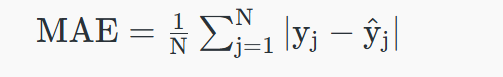

---
### 2. Mean Squared Error (MSE)

- **Definition:** MSE calculates the average of the **squared differences** between predicted and actual values.
- **Purpose:** Penalizes larger errors more heavily, making the model sensitive to outliers.
- **Pros:** Useful when large errors are undesirable.
- **Cons:** Can be misleading if outliers are not relevant to the model’s purpose.

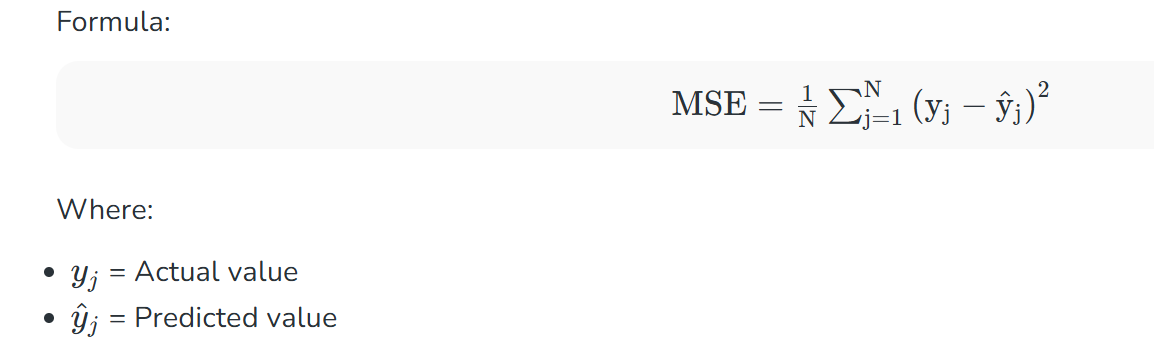

---

### 3. R² (R-squared)

- **Definition:** R² represents the **proportion of the variance** in the dependent variable that is predictable from the independent variables.
- **Interpretation:**
    - R² close to **1** → Model explains most of the variance (good fit).
    - R² close to **0** → Model explains very little of the variance (poor fit).
- **Purpose:** Used to assess the **goodness-of-fit** of regression models.

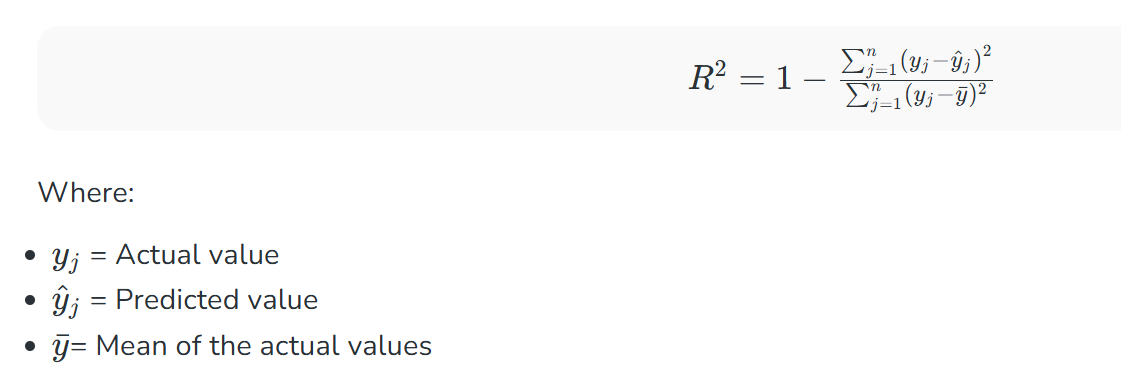

In [58]:
# Import required libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example actual and predicted values
y_actual = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

# Mean Absolute Error
mae = mean_absolute_error(y_actual, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error
mse = mean_squared_error(y_actual, y_pred)
print("Mean Squared Error (MSE):", mse)

# R-squared
r2 = r2_score(y_actual, y_pred)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.5
Mean Squared Error (MSE): 0.375
R-squared (R²): 0.9486081370449679


## Classification metrics 

- Classification problems aim to predict discrete categories.

### 1. Accuracy 
- It measures the proportion of correctly predicted instances (both true positives and true negatives) among all instances in the dataset.
- Formula : Accuracy = ( TP+TN  ) / ( TP+TN+FP+FN ),

**Where,**

TP (True Positives)      : The number of correctly predicted positive instances.

TN (True Negatives)   : The number of correctly predicted negative instances.

FP (False Positives)    : The number of incorrectly predicted positive instances.

FN (False Negatives) : The number of incorrectly predicted negative instances.


---

### 2. Precision 

- It quantifies the proportion of true positive predictions (correctly predicted positive instances) among all instances predicted as positive, whether they are true positives or false positives.
- Formula : Precision = TP / ( TP+FP )
  
---
### 3. Recall 

- It assesses a model's ability to correctly identify all positive instances within a dataset. It quantifies the proportion of true positive predictions (correctly predicted positive instances) among all instances that are actually positive.
- Formula: Recall = TP / TP + FN

---

### 4. F1-score

- The F1-Score is a widely used classification metric that combines both precision and recall into a single value. It provides a balanced assessment of a model's performance, especially when there is an imbalance between the classes being predicted.
- Formula : F1-Score = 2× ( ( Precision * Recall ) / ( Precision + Recall ) )

---

### 5. ROC-AUC

- The ROC curve is a graph used to evaluate how well a binary classification model separates positive and negative classes by plotting the true positive rate against the false positive rate at different threshold levels.
Here’s a concise version in one sentence each for your notes:

- **ROC Curve:** Plots TPR vs. FPR at different thresholds, showing the trade-off between sensitivity and specificity.
- **AUC (Area Under the Curve):** Measures the area under the ROC curve; higher values indicate better class separation, with 1.0 being perfect and 0.5 meaning random guessing.

--- 

**How AUC-ROC Works**

- **Purpose** : Measures how well a classification model distinguishes between positive and negative classes, independent of a threshold.

- **Mechanism** :

1. Model assigns a predicted probability of being positive to each data point.

2. Randomly select a positive and a negative example.

3. Check if the positive example has a higher predicted probability than the negative one.

4. Repeat for all positive-negative pairs.

---

**Interpretation:**

- AUC ≈ 1: Excellent separation between classes.

- AUC ≈ 0.5: Model is no better than random guessing.

- AUC ≈ 0: Model is doing the opposite of correct classification.

---

**When to Use**

- Effective for balanced datasets where all thresholds matter.

- Works best when false positives and false negatives are equally important.

- For highly imbalanced datasets, consider Precision-Recall curves instead.


In [59]:
# code for all the classification metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Example actual and predicted labels
y_actual = [0, 1, 1, 0, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 0, 1, 1]  # predicted classes
y_prob = [0.1, 0.9, 0.4, 0.2, 0.8, 0.3, 0.7, 0.6]  # predicted probabilities for positive class

# Accuracy
accuracy = accuracy_score(y_actual, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_actual, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_actual, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_actual, y_pred)
print("F1 Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(y_actual, y_prob)
print("ROC-AUC:", roc_auc)


Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
ROC-AUC: 0.9375


ROC-AUC: 0.9375


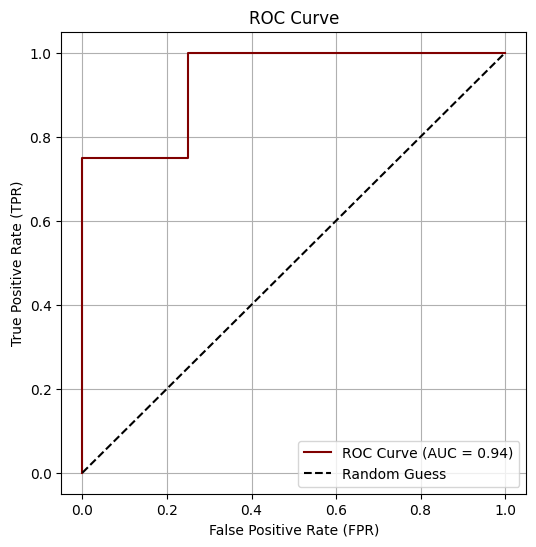

In [60]:
## ROC Curve 
# Import libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Example actual and predicted probabilities
y_actual = [0, 1, 1, 0, 1, 0, 1, 0]
y_prob = [0.1, 0.9, 0.4, 0.2, 0.8, 0.3, 0.7, 0.6]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_actual, y_prob)

# Compute AUC
roc_auc = roc_auc_score(y_actual, y_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='maroon', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='black', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## Cross Validation

**Cross-validation** is a method to evaluate a machine learning model's performance on unseen data. It splits the data into parts, repeatedly trains the model on some parts, and tests on the remaining part, averaging the results. Its main purpose is to prevent overfitting and ensure the model generalizes well to real-world data.

---

**Types of Cross-Validation**

1. **Holdout Validation**
- Splits data into training (50%) and testing (50%).
- Simple and fast.
- Drawback: May miss important info in the test set, leading to higher bias.
---
2. **LOOCV (Leave One Out Cross Validation)**
- Trains on all but one data point, tests on the omitted point; repeats for each point.
- Advantage: Low bias since all data points are used.
- Drawbacks: High variance if outliers exist; very time-consuming.
---
3. **Stratified Cross-Validation**
   
- Divides data into k folds while keeping class distribution consistent in each fold.
- Tests each fold once while training on the rest.
- Use: Best for imbalanced classification datasets to maintain class balance.
---
4. **K-Fold Cross Validation**

- Split dataset into K folds.
- Train the model on K−1 folds and test on the remaining fold; repeat for all folds.
- Average performance metrics across folds.

**Choosing K**

- Small K (e.g., 2–5): Faster but higher variance.
- Large K (e.g., 10 or n): Lower variance but higher computation; K = n is LOOCV.
- Standard choice: K = 10 for a balance of bias and variance.

**Variants of K-Fold**

1. **Stratified K-Fold**: Maintains class distribution in each fold (good for imbalanced datasets).
2. **Repeated K-Fold**: Repeats K-Fold multiple times for stable estimates.
3. **LOOCV**: Special case where K = number of data points.

**Benefits:**

- Uses all data points for training and testing.
- Reduces overfitting/underfitting risk.
- Works well for small datasets.
- Can be adapted for time-series data using time-based splits.

**Limitations:**

- Computationally expensive for large datasets or complex models.
- Risk of data leakage if preprocessing is not done carefully.
- Standard K-Fold may not suit sequential/time-series data without modifications.



In [88]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_iris()
X, y = data.data, data.target  

# K-Fold Cross Validation
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Perform Cross Validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")

average_accuracy = np.mean(scores) 
print(f"Average Accuracy: {average_accuracy:.2f}")

Accuracy for each fold: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average Accuracy: 0.96


## Hands-On

In [89]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


- numpy & pandas: Data manipulation.
- matplotlib.pyplot: For plotting graphs (ROC curve).
- load_breast_cancer: Built-in breast cancer dataset from sklearn.
- train_test_split: Split dataset into training and testing sets.
- cross_val_score, KFold: Perform K-Fold cross-validation.
- StandardScaler, MinMaxScaler: Scale numeric features.
- OneHotEncoder: Encode categorical variables as binary features.
- RandomForestClassifier: Machine learning model for classification.
- accuracy_score, precision_score, recall_score, f1_score, roc_auc_score: Evaluation metrics.

In [90]:
# Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", np.unique(y))


Dataset shape: (569, 30)
Target classes: [0 1]


- Loads the breast cancer dataset.
- X contains features (30 numeric columns).
- y contains labels (0 = malignant, 1 = benign).
- Prints the dataset shape and unique classes.

In [91]:
# Scaling
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)  # StandardScaler

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)    # MinMaxScaler


- StandardScaler: Standardizes features to mean=0, std=1.
- MinMaxScaler: Scales features to a range [0,1].
- This helps some ML models converge faster.

In [92]:
# One-Hot Encoding
X['diagnosis_type'] = np.random.choice(['A', 'B'], size=X.shape[0])
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(X[['diagnosis_type']])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['diagnosis_type']))

X_final = pd.concat([X.drop('diagnosis_type', axis=1), encoded_df], axis=1)


- Adds a dummy categorical column (diagnosis_type) for demonstration.
- Encodes it as binary features (one-hot encoding).
- Combines encoded columns with original features into X_final.

In [93]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

- Splits dataset into 70% training and 30% testing.
- stratify=y ensures the class distribution in train/test matches original dataset.

In [94]:
# Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Creates a Random Forest classifier.
- Trains the model using X_train and y_train.

In [95]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

- y_pred: Predicted class labels for test set.
- y_prob: Predicted probabilities for positive class (1). Used for ROC curve

In [96]:
# Confusion Matrix (Manual)
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 58   6]
 [  3 104]]


Counts:

- TP: True Positives (predicted 1, actual 1)
- TN: True Negatives (predicted 0, actual 0)
- FP: False Positives (predicted 1, actual 0)
- FN: False Negatives (predicted 0, actual 1)
- Forms the confusion matrix manually.

In [97]:
# ROC Curve (Manual)
thresholds = np.linspace(0, 1, 100)
tpr_list = []
fpr_list = []

for t in thresholds:
    y_thresh = (y_prob >= t).astype(int)
    TP = np.sum((y_test == 1) & (y_thresh == 1))
    TN = np.sum((y_test == 0) & (y_thresh == 0))
    FP = np.sum((y_test == 0) & (y_thresh == 1))
    FN = np.sum((y_test == 1) & (y_thresh == 0))
    
    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    FPR = FP / (FP + TN)  # False Positive Rate
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)


- Loops over thresholds from 0 to 1.
- Converts probabilities into predicted labels based on threshold.
- Calculates TPR (Recall) and FPR for each threshold.

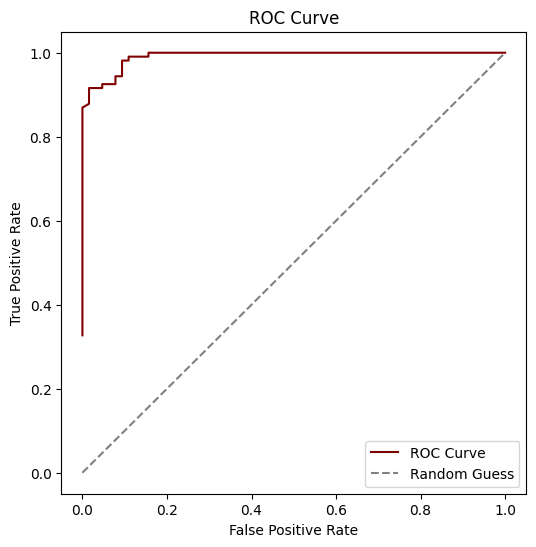

In [98]:
# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr_list, tpr_list, label='ROC Curve', color='maroon')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


- Plots ROC curve: TPR vs FPR.
- Diagonal line represents random guessing.

In [99]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)



Accuracy: 0.9473684210526315
Precision: 0.9454545454545454
Recall: 0.9719626168224299
F1-score: 0.9585253456221198
ROC-AUC: 0.9914573598130841


- Calculates common classification metrics:
- Accuracy, Precision, Recall, F1-score, ROC-AUC.
- ROC-AUC uses probability predictions.

In [100]:
# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_final, y, cv=kf, scoring='accuracy')
print("5-Fold Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


5-Fold Cross-validation Accuracy Scores: [0.96491228 0.96491228 0.94736842 0.96491228 0.94690265]
Mean CV Accuracy: 0.9578015836050303


- Performs 5-Fold CV on entire dataset.
- Prints accuracy for each fold and mean accuracy.
- Provides a more robust estimate of model performance.